In [67]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as scs

In [68]:
df = pd.read_csv('../data/AdSmartABdata.csv')
df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [69]:
#Determining the users who responded to the ads

response_df = df.query("(yes == 1 or no == 1)")
response_df.shape[0]

1243

In [70]:
#Total number of users
df.shape[0]

8077

Out of the 8077 users, only 1243 responded to the questionnaire

In [71]:
#Getting clean data containing only users who responded alongside relevant columns for testing

clean_df = response_df[['auction_id', 'experiment', 'yes', 'no']]
clean_df

,auction_id,experiment,yes,no
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,0,1
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,1,0
20,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,0,1
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,1,0
27,00ebf4a8-060f-4b99-93ac-c62724399483,control,0,1
...,...,...,...,...
8059,ffa08ff9-a132-4051-aef5-01a9c79367bc,exposed,1,0
8063,ffb176df-ecd2-45d3-b05f-05b173a093a7,exposed,1,0
8064,ffb79718-6f25-4896-b6b3-e58b80a6e147,control,0,1
8069,ffca1153-c182-4f32-9e90-2a6008417497,control,0,1


The rates of aware users in both the control and exposed groups are as shown in the yes column above

In [72]:
actual_counts = clean_df.pivot_table(index='experiment', aggfunc='sum')
actual_counts['total'] = clean_df.pivot_table(values='yes', index='experiment', aggfunc='count')
actual_counts


,no,yes,total
experiment,,,
control,322,264,586
exposed,349,308,657


The actual number of users aware and those not aware of the ad and the totals for each group

In [73]:
#Determining the number of users aware or not between the two groups to determine their conversion rates

conversion_rates = clean_df.pivot_table(index='experiment')
conversion_rates

,no,yes
experiment,,
control,0.549488,0.450512
exposed,0.531202,0.468798


## Binomial Distribution

In [74]:
# fig, ax = plt.subplots(figsize=(12,6))
# xA = np.linspace(A_converted-49, A_converted+50, 100)
# yA = scs.binom(A_total, p_A).pmf(xA)
# ax.bar(xA, yA, alpha=0.5)
# xB = np.linspace(B_converted-49, B_converted+50, 100)
# yB = scs.binom(B_total, p_B).pmf(xB)
# ax.bar(xB, yB, alpha=0.5)
# plt.xlabel('converted')
# plt.ylabel('probability')

The above is a template for drawing the binomial distribution for the null and alternative hypothesis

In [82]:
%cd ../scripts

import DistributionPlots as dp
import ABTestingFunctions as ab

D:\10 Academy\Week 2\SmartAd_AB_test\scripts


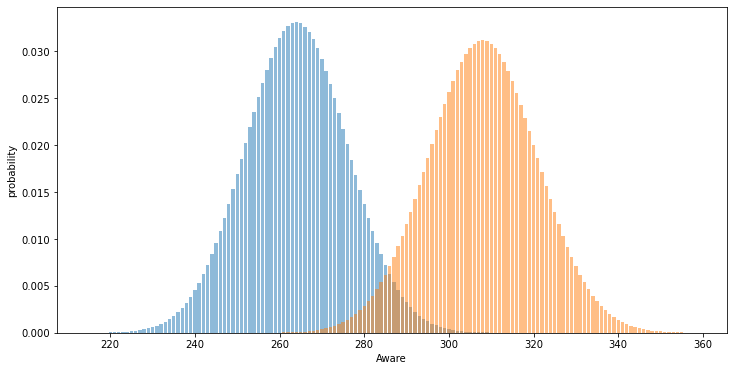

In [83]:
import DistributionPlots as dp

new = dp.DistributionPlots()

new.cont_exp_distribution(control_aware, expose_aware, control_total, exposed_total, control_conversion_rate, exposed_conversion_rate)

TypeError: show_area() got multiple values for argument 'area_type'

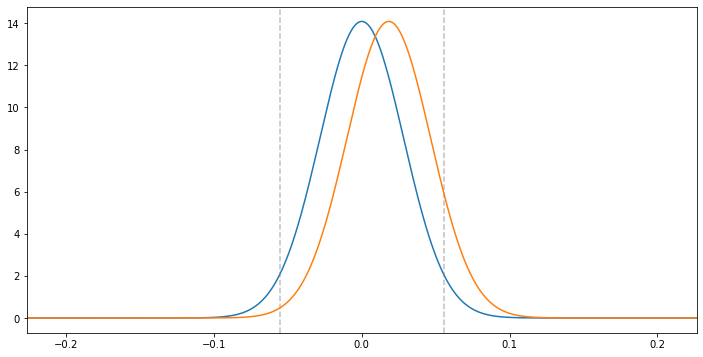

In [84]:
new.null_alt_distribution(control_total, exposed_total,control_conversion_rate, exposed_conversion_rate)

The grey vertical lines shows the 95% confidence interval for null hypothesis. The statistical power is the area under the graph on the alternative hypothesis that is away from the confidence interval

In [85]:
#Determining the z_value for a given significance level

ab = ab.ABTesting()
ab.z_val(sig_level=0.05, two_tailed=True)

1.959963984540054

The z-score enables us to standardize our variable and perform comparison on the same scale. It enables us to determine whether the the sample mean is significantly different from the population mean.

In [86]:
#The confidence interval
ab.confidence_interval(sample_mean=0, sample_std=1, sample_size=1,
                            sig_level=0.05)

(-1.959963984540054, 1.959963984540054)

 Displays the probability that a parameter will fall between a pair of values around the mean

In [88]:
# p_A is the conversion rate of the control group
# p_B is the conversion rate of the test group

# ab.p_val( Control, Exposed, p_A, p_B)
Control = actual_counts['total']['control']
Exposed = actual_counts['total']['exposed']
p_A = conversion_rates['yes']['control']
p_B = conversion_rates['yes']['exposed']

ab.p_val( Control, Exposed, p_A, p_B)

4.3475346228881034e-05

The p value is lower than the significance level and therefore we reject the null hypothesis. The new ad resulted into increased user engagement